<a href="https://colab.research.google.com/github/Alexdatser/dosronbek-AI-application-/blob/main/LinearRegression(week6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow==1.15.5




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110.5 MB 1.5 kB/s 
     |████████████████████████████████| 2.9 MB 87.6 MB/s 
     |████████████████████████████████| 50 kB 7.5 MB/s 
     |████████████████████████████████| 20.1 MB 1.2 MB/s 
     |████████████████████████████████| 3.8 MB 69.8 MB/s 
     |████████████████████████████████| 503 kB 79.2 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=e3d367f1a5faf9d870330d171a6a153f404105205d123cdc8b73f86f791e3998
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninst

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [6]:
learning_parameter = 0.01
epochs = 300

In [7]:
sample_points = 50
x_train = np.linspace(0, 30, sample_points)
y_train = 6*x_train + 7*np.random.randn(sample_points)


<function matplotlib.pyplot.show(*args, **kw)>

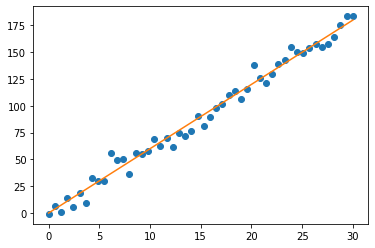

In [8]:
# Noisy dataset
plt.plot(x_train, y_train, 'o')
# Noise free dataset 
plt.plot(x_train, 6*x_train)
plt.show

In [9]:
Y = tf.placeholder(tf.float32)
X = tf.placeholder(tf.float32)

W = tf.Variable(np.random.randn(), name = 'weights')
B = tf.Variable(np.random.randn(), name = 'bias')

In [10]:
#Create the model for regression
prediction = W*X + B

# Cost function
cost_iteration = tf.reduce_sum((prediction-Y)**2)/(2*sample_points)

#Define the optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_parameter).minimize(cost_iteration)

# Initialize the variables
init = tf.global_variables_initializer()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epochs 0.000000 Cost 1.294635 Weight 5.715763 Bias 0.545876
Epochs 40.000000 Cost 0.066145 Weight 6.013482 Bias 0.420641
Epochs 80.000000 Cost 0.065112 Weight 6.018522 Bias 0.289603
Epochs 120.000000 Cost 0.064184 Weight 6.023086 Bias 0.170943
Epochs 160.000000 Cost 0.063350 Weight 6.027218 Bias 0.063494
Epochs 200.000000 Cost 0.062598 Weight 6.030960 Bias -0.033805
Epochs 240.000000 Cost 0.061923 Weight 6.034348 Bias -0.121911
Epochs 280.000000 Cost 0.061313 Weight 6.037417 Bias -0.201694


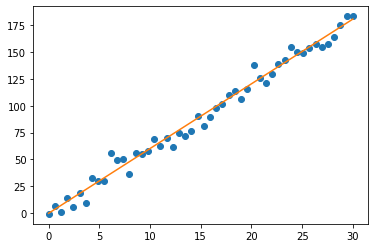

In [11]:
with tf.Session() as sess:
  sess.run(init)
  for epoch in range(epochs):
    for x, y in zip(x_train, y_train):
      sess.run(optimizer, feed_dict = {X : x, Y : y})
    if not epoch%40:
      W1 = sess.run(W)
      B1 = sess.run(B)
      cost_iter = sess.run(cost_iteration, feed_dict = {X : x, Y : y})
      print('Epochs %f Cost %f Weight %f Bias %f' %(epoch, cost_iter, W1, B1))
  Weight = sess.run(W)
  Bias = sess.run(B)

  plt.plot(x_train, y_train, 'o')
  plt.plot(x_train,Weight*x_train+Bias)
  plt.show()

In [12]:
# Create the model for regression
with tf.name_scope("Model") as scope:
  prediction = W*X + B

# Add summary to study behaviour of weights and biases with epochs
weight_histogram = tf.summary.histogram("Weights", W)
bias_histogram = tf.summary.histogram("Bias", B)

# Cost function
with tf.name_scope("Cost_function") as scope:
  cost_iteration = tf.reduce_sum((prediction-Y)**2)/(2*sample_points)

# Record the scalar summary of the cost function
cost_summary = tf.summary.scalar("Cost", cost_iteration)

In [13]:
#Define the optimizer
with tf.name_scope("Training") as scope:
  optimizer = tf.train.GradientDescentOptimizer(learning_parameter).minimize(cost_iteration)

# Initialize the variables
init = tf.global_variables_initializer()

#Merge all the summaries into a single operator
merged_summary = tf.summary.merge_all()

Epochs 0.000000 Cost 1.294635 Weight 5.715763 Bias 0.545876
Epochs 40.000000 Cost 0.066145 Weight 6.013482 Bias 0.420641
Epochs 80.000000 Cost 0.065112 Weight 6.018522 Bias 0.289603
Epochs 120.000000 Cost 0.064184 Weight 6.023086 Bias 0.170943
Epochs 160.000000 Cost 0.063350 Weight 6.027218 Bias 0.063494
Epochs 200.000000 Cost 0.062598 Weight 6.030960 Bias -0.033805
Epochs 240.000000 Cost 0.061923 Weight 6.034348 Bias -0.121911
Epochs 280.000000 Cost 0.061313 Weight 6.037417 Bias -0.201694


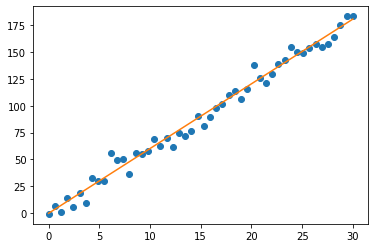

In [14]:
# Define the tensorflow session
with tf.Session() as sess:
  sess.run(init)
  writer = tf.summary.FileWriter('./log', sess.graph)
  for epoch in range(epochs):
    for x, y in zip(x_train, y_train):
      sess.run(optimizer, feed_dict = {X : x, Y : y})

      # Write logs for each epochs
      summary_epochs = sess.run(merged_summary, feed_dict = {X : x, Y : y})
      writer.add_summary(summary_epochs, epoch)
    if not epoch%40:
      W1 = sess.run(W)
      B1 = sess.run(B)
      cost_iter = sess.run(cost_iteration, feed_dict = {X : x, Y : y})
      print('Epochs %f Cost %f Weight %f Bias %f' %(epoch, cost_iter, W1, B1))
  Weight = sess.run(W)
  Bias = sess.run(B)

  plt.plot(x_train, y_train, 'o')
  plt.plot(x_train,Weight*x_train+Bias)
  plt.show()